#**Sales Analysis**

## **Objective:** 
1. To analyze the customer trends and their buying patterns in different regions across USA.
2. To determine most sold product type.
4. Which shipment mode did customers prefer more?


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('/content/train.csv')
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

**Dataset Description:**
1. **Row ID:** This is the duplicated row i.e. index row of the dataset of type integer
2. **OrderID:** Has order id's of customers with data type object
3. **Order Date:** It has the date of order and is of type object as from original dataset
4. **Ship Date**: This column has the shipping dates for each order of type object.
5. **Customer ID** : It has all customer id's of type object.
6. **Customer Name:** It has customer names of type object
7. **Segement:** This column reveals the segemnt of each order i.e, public,private or residential product.This is of type object
8. **Country**:It has the country of customer of type object
9. **City:** It has the city of customer of type object
10. **State:** It has the state of customer of type object
11. **Postal Code:** It has postal codes for each customer of type float
12. **Region:** It has the regional details of customers's location.Values are of type object
13. **Product ID:** It has id's of project of type object
14. **Category:** It has categorical details of product ordered.This is of type object.
15. **Sub-Category:** It has sub-details of each product category of type object
16. **Product Name:** Name of the product of type object
17. **Sales**: Price of the order
18. **Ship Mode:** class of delivery i.e first class,second class or standard delivery.

**For this analysis, we don't need ROW ID,OrderID, Ship Date,Customer ID, Product ID and Category columns.So, I drop these columns and save it to new dataframe**

In [2]:
my_df=df.drop(columns=['Row ID', 'Order ID','Ship Date','Customer ID','Product ID','Category'])

In [37]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9800 non-null   object 
 1   Ship Mode      9800 non-null   object 
 2   Customer Name  9800 non-null   object 
 3   Segment        9800 non-null   object 
 4   Country        9800 non-null   object 
 5   City           9800 non-null   object 
 6   State          9800 non-null   object 
 7   Postal Code    9789 non-null   float64
 8   Region         9800 non-null   object 
 9   Sub-Category   9800 non-null   object 
 10  Product Name   9800 non-null   object 
 11  Sales          9800 non-null   float64
dtypes: float64(2), object(10)
memory usage: 918.9+ KB


**In the dataframe my_df, there are nulls present only in Postal Code column.So, I drop these nulls making null count a consistent value of 9789**

In [35]:
df_1=my_df.dropna(axis=0, how='any')

Order Date       0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [34]:
df_2=df_1.rename(columns={'Sub-Category':'Product Type'})

Staple envelope                                                              47
Staples                                                                      46
Easy-staple paper                                                            44
Avery Non-Stick Binders                                                      20
Staples in misc. colors                                                      18
                                                                             ..
RCA H5401RE1 DECT 6.0 4-Line Cordless Handset With Caller ID/Call Waiting     1
Cisco SPA525G2 5-Line IP Phone                                                1
RCA ViSYS 25423RE1 Corded phone                                               1
Cubify CubeX 3D Printer Triple Head Print                                     1
Bush Birmingham Collection Bookcase, Dark Cherry                              1
Name: Product Name, Length: 1848, dtype: int64

In [6]:
df_2['Order Date'] = pd.to_datetime(df_2['Order Date'],errors='coerce')
df_2['Month']= df_2['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
df_2['Year']= df_2['Order Date'].apply(lambda x: x.strftime('%Y'))

**The 'Order Date' column in dataset has dates of type object.So, I converted them to datetime[ns].
Extracted Month and Year from 'Order Date' to analyze trends.** 

In [ ]:
df_sales_trend =df_2.groupby('Month').sum()['Sales'].reset_index()

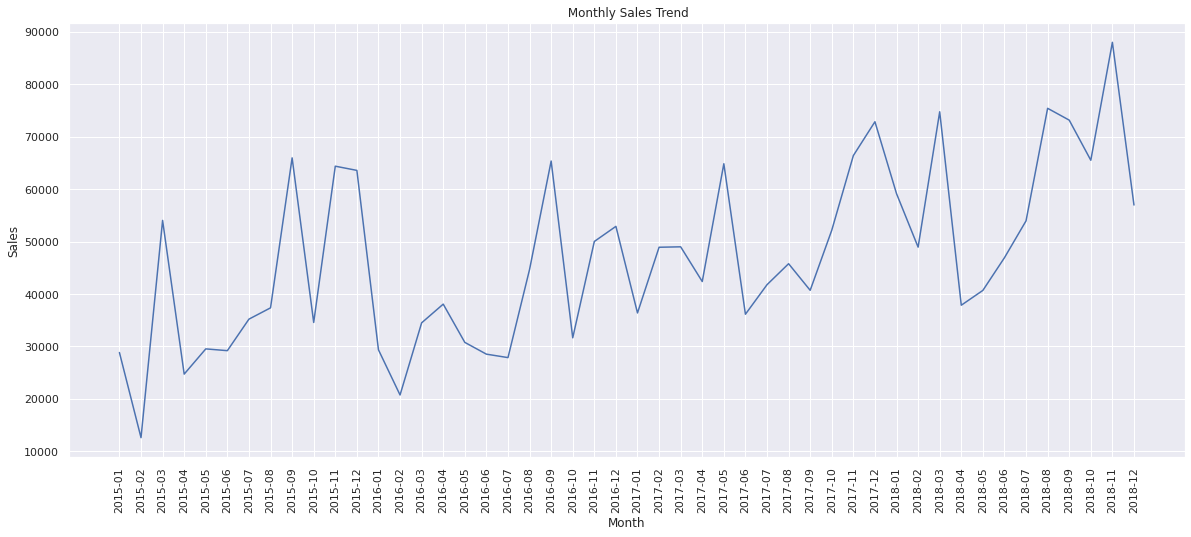

In [20]:
import seaborn as sns
plt.figure(figsize = (20,8))
sns.lineplot(x=df_sales_trend['Month'],y=df_sales_trend['Sales'])
plt.title(' Monthly Sales Trend')
plt.xticks(rotation='vertical')
plt.show()

* This lineplot depicts the total sales in each monnth during the period starting from January, 2015 and ending at December,2018.
* As we observe the plot, total sales dropped every February and rose every September.

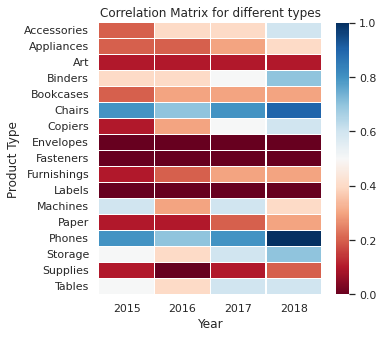

In [22]:
gb_type=(pd.pivot_table(df_2,values='Sales',index='Product Type',columns='Year',aggfunc=np.sum)/100000).round(1)
sns.heatmap(gb_type,cmap='RdBu',linewidths=.5)
plt.title('Correlation Matrix for different types')
sns.set(rc = {'figure.figsize':(5,5)})

This matrix correlates the sales in each year to the total sales of each product type.

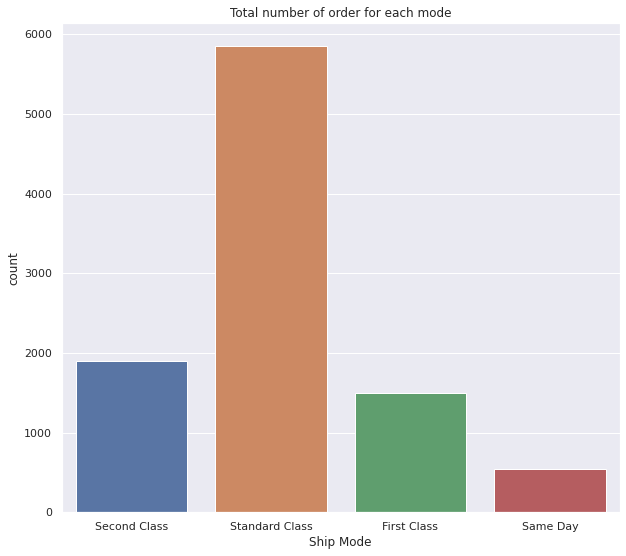

In [30]:
plt.figure(figsize=(10, 9))
sns.countplot(x='Ship Mode', data=df_2)
plt.title('Total number of order for each mode')
plt.show()

We can infer from this bar chart that most of the customers have choosen Standard class as a mode of delivery despite First class.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


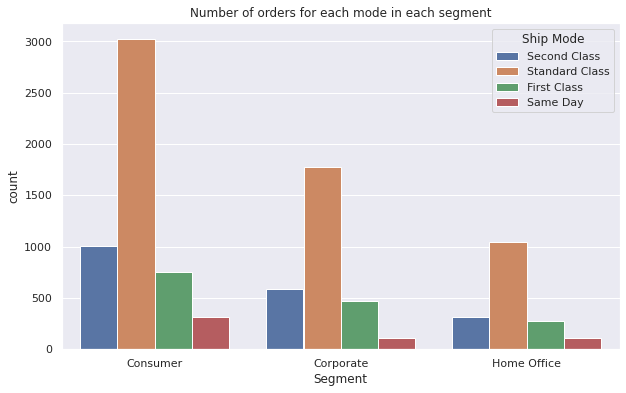

In [31]:
sns.countplot('Segment', hue = 'Ship Mode',data = df_2)
plt.title('Number of orders for each mode in each segment')
sns.set(rc = {'figure.figsize':(10,6)})

All the three segements of products are delivered mostly in standard mode.Least prefered class is Same day delivery because of its cost.

Text(0.5, 1.0, 'Number of orders for each product type')

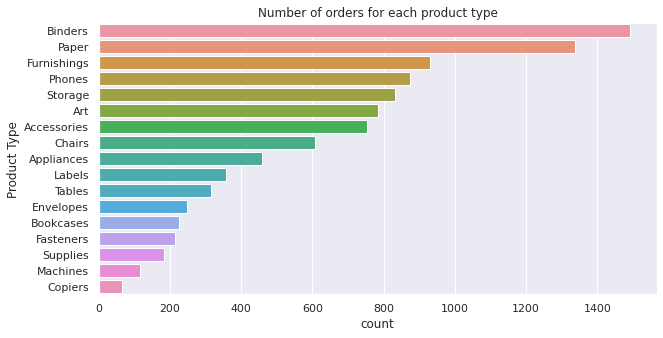

In [29]:
plt.subplots(figsize =[10,5])
sns.countplot(y = 'Product Type', data = df_2, order = df_2['Product Type'].value_counts().index)
plt.title('Number of orders for each product type')

Most of the products sold are from Binders categories i.e, almost 1500 count.Papers are sold relatively close to binders.But Copiers are the least sold.

In [44]:
region_prod_type=pd.pivot_table(df_2,values='Sales',index='Region',columns='Product Type',aggfunc=np.sum)
region_prod_type

Product Type,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Region,,,,,,,,,,,,,,,,,
Central,32742.302,21176.833,5746.188,56865.012,23773.7112,82372.776,37259.570,4537.304,769.570,15016.004,2435.536,26797.384,17184.988,71939.952,45407.440,9467.372,39154.971
East,43601.228,33576.138,7422.934,51255.775,39414.4340,94972.309,53219.462,4136.206,819.718,28145.326,2554.914,66106.165,19445.914,98589.912,67864.366,10655.336,38809.219
South,26906.154,19525.326,4510.424,36734.365,10899.3620,44739.246,9299.756,3345.556,503.316,17062.660,2344.180,53890.960,13891.576,58098.338,35251.100,8318.928,43830.212
West,60632.006,29797.166,9017.824,55173.633,35320.7915,100023.200,46469.306,4106.940,909.356,28988.028,5013.096,42444.122,26213.626,97859.496,69256.196,17978.672,81016.226


Text(0.5, 1.0, 'Total sales for each product in different regions of USA')

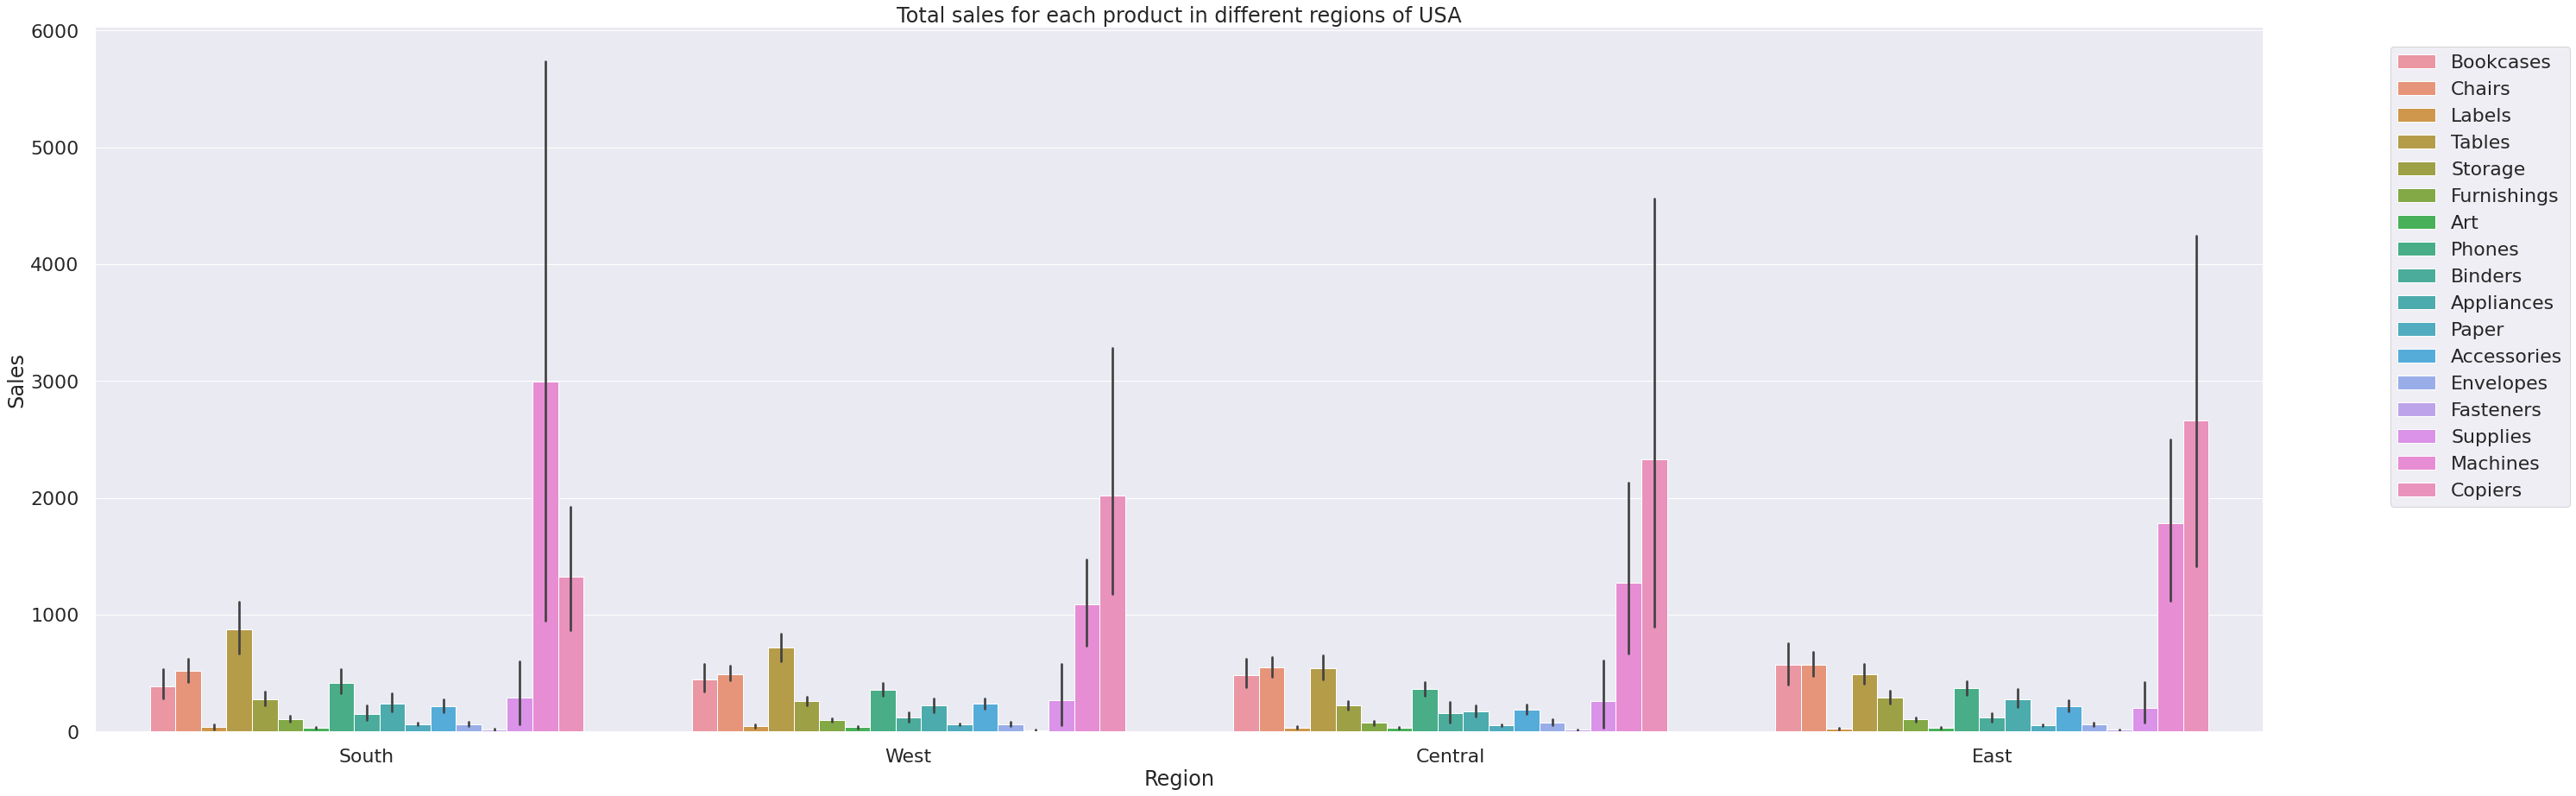

In [32]:
plt.figure(figsize=(45,15))
sns.set(font_scale=2)
sns.barplot(data=df_2 , x = "Region",y = "Sales" ,hue = "Product Type")
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
plt.title('Total sales for each product in different regions of USA')

This barplot shows the region wise sales of each product category.Machines are most selling product category in Southern region.But in the rest of USA, Copiers are more sold.People did not tend to use fasteners, very much.

In [15]:
region_sales = df_2.groupby(['Region'])['Sales'].sum().reset_index()
region_sales

,Region,Sales
0,Central,492646.9132
1,East,660589.3560
2,South,389151.4590
3,West,710219.6845


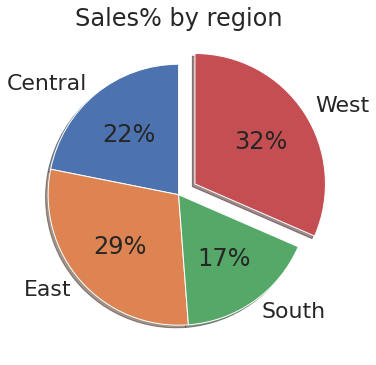

In [33]:
plt.pie(region_sales.Sales, labels = region_sales.Region, startangle = 90, autopct = "%2.0f%%",shadow = True, explode = [0, 0, 0, 0.15],)
plt.title("Sales% by region")
plt.show()

This pie chart shows the total sales in each region.Western region has most sales whereas South region has the least sales.